# 1. Necessary Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae , r2_score

# 2. Loading The Dataset

In [2]:
df=pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# 3. Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df['Age']=2024-df['Year']
df.drop(columns=['Year'],inplace=True)

In [6]:
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,7


In [8]:
num=df.select_dtypes(include=np.number)
num

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
0,3.35,5.59,27000,0,10
1,4.75,9.54,43000,0,11
2,7.25,9.85,6900,0,7
3,2.85,4.15,5200,0,13
4,4.60,6.87,42450,0,10
...,...,...,...,...,...
296,9.50,11.60,33988,0,8
297,4.00,5.90,60000,0,9
298,3.35,11.00,87934,0,15
299,11.50,12.50,9000,0,7


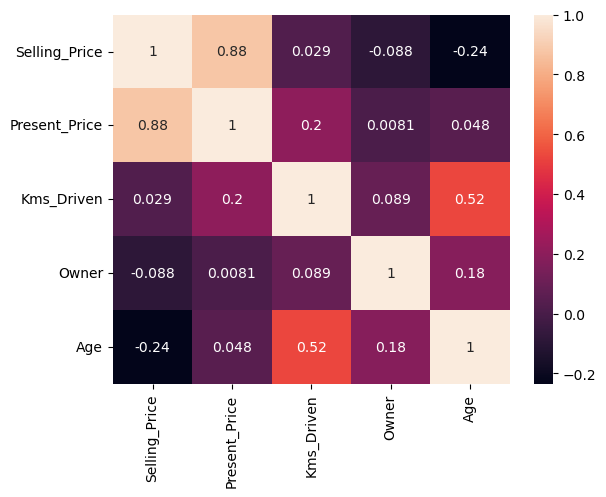

In [10]:
sns.heatmap(num.corr(),annot=True);

In [50]:
for i in  df.select_dtypes(include='object'):
    print(i,'.....',df[i].nunique())


Car_Name ..... 98
Fuel_Type ..... 3
Seller_Type ..... 2
Transmission ..... 2


In [11]:
df1=pd.get_dummies(df,columns=['Car_Name','Fuel_Type','Seller_Type','Transmission'],drop_first=True)
df1

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,4.75,9.54,43000,0,11,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,7.25,9.85,6900,0,7,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2.85,4.15,5200,0,13,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,4.60,6.87,42450,0,10,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,8,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
297,4.00,5.90,60000,0,9,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
298,3.35,11.00,87934,0,15,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
299,11.50,12.50,9000,0,7,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [54]:
avg=df1.groupby(['Car_Name'])['Selling_Price'].mean().reset_index().rename(columns={'Selling_Price':'avg_price'})
avg

,Car_Name,avg_price
0,800,0.350000
1,Activa 3g,0.310000
2,Activa 4g,0.400000
3,Bajaj ct 100,0.180000
4,Bajaj Avenger 150,0.750000
...,...,...
93,sx4,3.158333
94,verna,6.107857
95,vitara brezza,9.250000
96,wagon r,2.512500


In [56]:
df2=pd.merge(df1,avg,how='outer',on='Car_Name')
df2

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,avg_price
0,800,0.35,2.28,127000,0,21,False,True,True,True,0.350000
1,Activa 3g,0.45,0.54,500,0,8,False,True,True,False,0.310000
2,Activa 3g,0.17,0.52,500000,0,16,False,True,True,False,0.310000
3,Activa 4g,0.40,0.51,1300,0,7,False,True,True,False,0.400000
4,Bajaj ct 100,0.18,0.32,35000,0,9,False,True,True,True,0.180000
...,...,...,...,...,...,...,...,...,...,...,...
296,wagon r,2.90,4.41,56879,0,11,False,True,False,True,2.512500
297,wagon r,1.05,4.15,65000,0,18,False,True,False,True,2.512500
298,xcent,5.75,7.13,12479,0,7,False,True,False,True,4.966667
299,xcent,4.75,7.13,35866,1,9,False,True,False,True,4.966667


In [58]:
df2.drop(columns='Car_Name',inplace=True)

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,avg_price
0,0.35,2.28,127000,0,21,False,True,True,True,0.350000
1,0.45,0.54,500,0,8,False,True,True,False,0.310000
2,0.17,0.52,500000,0,16,False,True,True,False,0.310000
3,0.40,0.51,1300,0,7,False,True,True,False,0.400000
4,0.18,0.32,35000,0,9,False,True,True,True,0.180000
...,...,...,...,...,...,...,...,...,...,...
296,2.90,4.41,56879,0,11,False,True,False,True,2.512500
297,1.05,4.15,65000,0,18,False,True,False,True,2.512500
298,5.75,7.13,12479,0,7,False,True,False,True,4.966667
299,4.75,7.13,35866,1,9,False,True,False,True,4.966667


In [13]:
X=df1.drop(columns=['Selling_Price'])
y=df1['Selling_Price']

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
st=StandardScaler()
x_scaled=st.fit_transform(X)
x_scaled

array([[-0.23621461, -0.25622446, -0.17450057, ...,  0.50932723,
        -0.73728539,  0.39148015],
       [ 0.22150462,  0.1559105 , -0.17450057, ..., -1.96337432,
        -0.73728539,  0.39148015],
       [ 0.25742689, -0.77396901, -0.17450057, ...,  0.50932723,
        -0.73728539,  0.39148015],
       ...,
       [ 0.39068691,  1.31334003, -0.17450057, ...,  0.50932723,
        -0.73728539,  0.39148015],
       [ 0.56450434, -0.7198763 , -0.17450057, ..., -1.96337432,
        -0.73728539,  0.39148015],
       [-0.20029235, -0.81095812, -0.17450057, ...,  0.50932723,
        -0.73728539,  0.39148015]])

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,train_size=0.80,random_state=2)

In [17]:
lr=LinearRegression()

In [18]:
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
m=lr.coef_
m

array([ 5.24462321e+00, -1.06007437e-01,  7.27365092e-03, -1.71393803e+00,
       -4.09240835e-01, -4.81886621e-01, -5.44115797e-01, -4.59174951e-01,
        5.03129566e+13, -6.73889160e-01, -5.01220703e-01, -2.14498824e+14,
       -4.14708319e+13, -2.97363281e-01, -1.48925781e-01, -4.20654297e-01,
        4.61832937e+13, -2.95410156e-01, -3.60351562e-01, -4.80468750e-01,
       -4.40917969e-01, -1.10231760e+14, -2.18261719e-01, -4.05273438e-01,
       -4.00329590e-01,  9.72223562e+13, -6.68945312e-02, -4.69737974e+12,
       -5.30761719e-01,  2.97851562e-02, -5.78125000e-01, -2.40417970e+13,
       -4.68750000e-02, -4.95605469e-01, -6.26953125e-01, -6.97631836e-01,
       -4.27246094e-01, -2.11334229e-01,  2.00280359e+13, -3.47351074e-01,
       -5.01953125e-01, -3.99414062e-01, -2.10937500e-01, -7.11914062e-01,
       -1.66775608e+13, -6.44531250e-01, -4.05761719e-01, -5.97656250e-01,
       -2.97851562e-01, -9.02343750e-01, -3.30078125e-01, -5.99609375e-01,
       -5.98144531e-01, -

In [20]:
c=lr.intercept_
c

5599715356349.356

In [21]:
y_pred_test=lr.predict(x_test)
y_pred_train=lr.predict(x_train)

In [22]:
print('mean squared error on test data',mse(y_test,y_pred_test))
print('mean squared error on train data',mse(y_train,y_pred_train))

mean squared error on test data 5.498553517422225e+29
mean squared error on train data 2.4682723190307616


In [23]:
r2_score(y_train,y_pred_train)

0.9105886457915997

In [24]:
r2_score(y_test,y_pred_test)

-2.993797156947379e+28

In [25]:
sns.heatmap

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>